[View in Colaboratory](https://colab.research.google.com/github/GokulDas027/ML-Codes/blob/master/MNIST-Keras.ipynb)

# MNIST with tf.keras



In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Mnist Dataset Sample

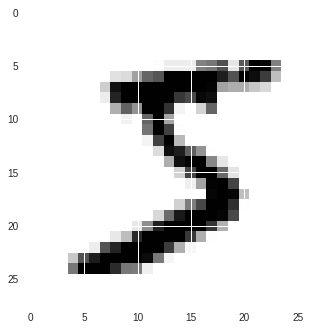

In [3]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalising Dataset

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

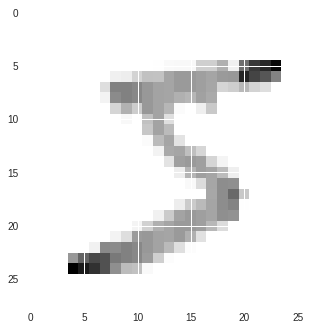

In [6]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [7]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Defining Model

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


## Compiling Model

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Training the model

In [30]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.0567 - acc: 0.9820
Epoch 2/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.0417 - acc: 0.9861
Epoch 3/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.0333 - acc: 0.9890
Epoch 4/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.0269 - acc: 0.9908
Epoch 5/5
60000/60000 [==============================] - 8s 125us/step - loss: 0.0211 - acc: 0.9929


## Testing the model

In [31]:
loss_val, accuracy_val = model.evaluate(x_test, y_test)
print('loss is',loss_val)
print('accuracy is',accuracy_val)

10000/10000 [==============================] - 0s 34us/step
loss is 0.10093973273078737
accuracy is 0.9746


## Prediction


In [32]:
predictions = model.predict([x_test])
predictions

array([[9.4914976e-10, 3.6124864e-11, 2.2202578e-08, ..., 9.9998558e-01,
        3.1797131e-07, 7.0218062e-09],
       [2.7779916e-12, 1.6197548e-08, 1.0000000e+00, ..., 6.6735029e-13,
        5.0200827e-13, 7.0571112e-17],
       [1.2573163e-09, 9.9991524e-01, 2.8348603e-07, ..., 8.0339079e-05,
        4.1025301e-06, 3.1954084e-09],
       ...,
       [1.3441980e-12, 3.7710959e-09, 1.6277374e-11, ..., 2.4200011e-07,
        8.5099004e-11, 3.1396310e-06],
       [7.4407034e-12, 3.6917228e-15, 4.7525989e-14, ..., 3.1116200e-11,
        1.9037042e-06, 2.2901357e-12],
       [1.6627334e-10, 8.4721674e-12, 3.6262579e-12, ..., 2.7442154e-13,
        5.8331877e-09, 1.4061394e-12]], dtype=float32)

In [37]:
prediction = np.argmax(predictions[0])
prediction

7

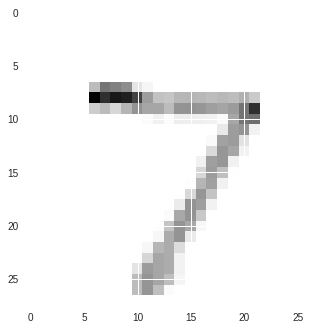

In [38]:
plt.imshow(x_test[0])

#Tip

## Saving a model
```
model.save('model_name.model')
```
## Loading a Saved model


```
loaded_model = tf.keras.models.load_models('model_name.model')
```


